In [1]:
%matplotlib widget
import geopandas
import pandas
import zarr
import xarray
import numpy as np
import dask
import pyproj
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
region = 'LBNL'
zarr_store = f'/tablespace/sentinel2/{region}_results.zarr'
ds = xarray.open_zarr(zarr_store)

In [3]:
ds = ds.sortby('time')

# Apply cloud filter

In [4]:
zarr_store = f'/tablespace/sentinel2/{region}_sharpend.zarr/'
ds_shaprend = xarray.open_zarr(zarr_store)

In [5]:
ds['fsca'] = ds['fsca'].where(ds_shaprend['CLD']<0.4)

In [6]:
variable = 'fsca'

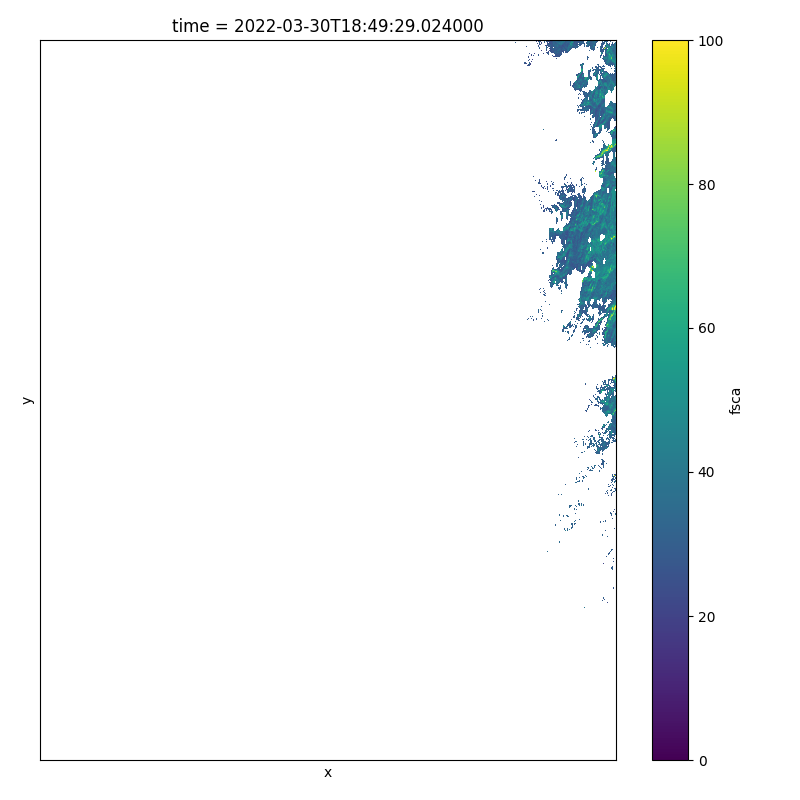

In [7]:
fig, ax = plt.subplots(figsize=(8, 8), dpi=100)

margin = 0.05
fig.subplots_adjust(left=margin, right=1-margin, top=1-margin, bottom=margin)
im = ds[variable].isel(time=5).plot.imshow(ax=ax, add_colorbar=True, xticks=[], yticks=[], add_labels=True)

# Animation

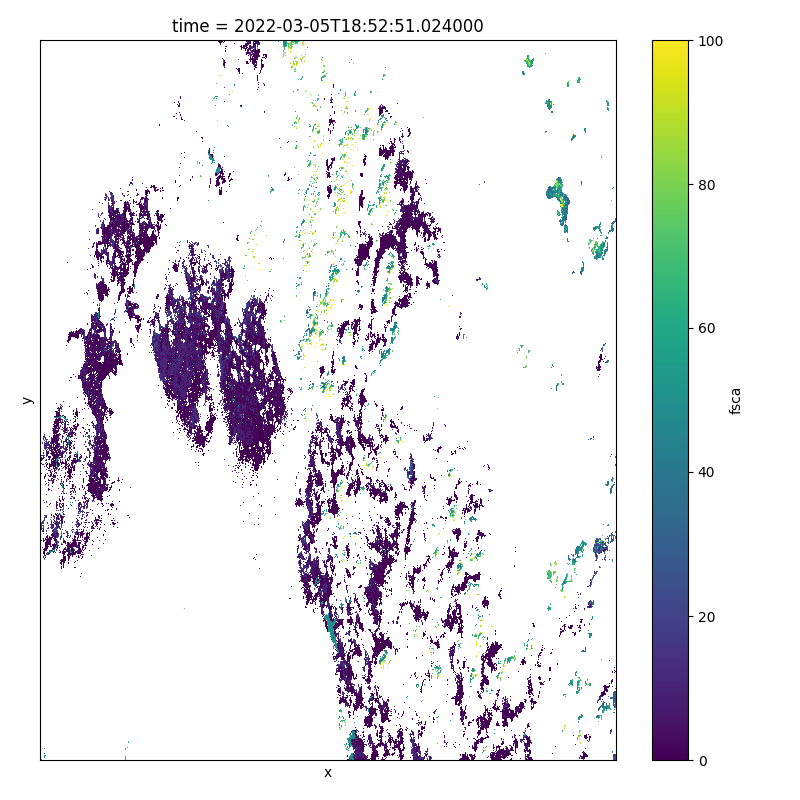

In [8]:
fig, ax = plt.subplots(figsize=(8, 8), dpi=100)
margin = 0.05
fig.subplots_adjust(left=margin, right=1-margin, top=1-margin, bottom=margin)

im = ds[variable].isel(time=0).plot.imshow(ax=ax, add_colorbar=True, xticks=[], yticks=[])

def update(frame):
    ax.clear()     
    im = ds[variable].isel(time=frame).plot.imshow(ax=ax, add_colorbar=False, xticks=[], yticks=[])    
    
anim = FuncAnimation(fig, update, frames=len(ds.time), interval=200, blit=True, repeat=True)
plt.show()

In [ ]:
anim.save(f'{region}_{variable}.mp4', fps=5, extra_args=['-vcodec', 'libx264'])
#anim.save(f'{region}_{variable}.mkv', fps=5, writer='ffmpeg')  

In [ ]:
plt.close()